<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_SVM_(_SALARY_DATA_DATASET_)Rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare a classification model using SVM for salary data

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=66e5c9aa846ffa8df402a10291d05f2b948b99b7ef8923ceacc30b7851073601
  Stored in directory: /tmp/pip-ephem-wheel-cache-wg1fc5aq/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filena

In [ ]:
import os
os._exit(00)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('/content/SalaryData_Train(1).csv')
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df2=pd.read_csv('/content/SalaryData_Test(1).csv')
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df1['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
print('Shape of dataframe before dropping duplicates',df1.shape)

Shape of dataframe before dropping duplicates (30161, 14)


In [8]:
df1.drop_duplicates(keep=False,inplace=True)

In [9]:
print('Shape of dataframe after dropping duplicates',df1.shape)

Shape of dataframe after dropping duplicates (24943, 14)


In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title="data set", html={'style' : {'full_width':True}})
profile.to_file(output_file='salarydata_profile.html')

<ipython-input-10-8133c5f3cc47>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df1['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [12]:
df1.drop('native',axis=1,inplace=True)

In [13]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [14]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df1[col]=le.fit_transform(df1[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [15]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


## Feature selection using ExtraTreesClassifier

In [16]:
np.any(np.isnan(df1))

False

In [17]:
np.all(np.isfinite(df1))

True

In [18]:
df1.dropna() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,0


In [19]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [21]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)


'binary'

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)


[0.22159775 0.05558998 0.02942877 0.09389845 0.11523823 0.0882835
 0.07236542 0.01746535 0.02166652 0.11422178 0.03712844 0.1331158 ]


In [24]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [25]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.221598
hoursperweek     0.133116
maritalstatus    0.115238
capitalgain      0.114222
educationno      0.093898
occupation       0.088284
relationship     0.072365
workclass        0.055590
capitalloss      0.037128
education        0.029429
sex              0.021667
race             0.017465
dtype: float64

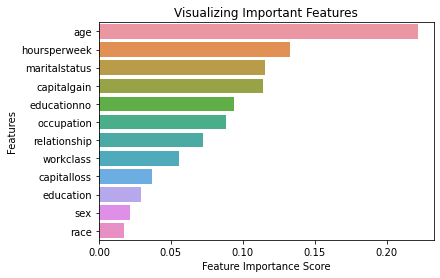

In [26]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [28]:
## Dropping the fivecolumns having least feature importance
df1.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [29]:
df1.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0


In [31]:
df1[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df1[['age','capitalgain','hoursperweek']] = scaler.fit_transform(df1[['age','capitalgain','hoursperweek']])
df1.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.032827,13,4,0,1,0.107996,-0.101894,0
1,0.799379,13,2,3,0,-0.161349,-2.246120,0
2,-0.108483,9,0,5,1,-0.161349,-0.101894,0
3,1.026344,7,2,5,0,-0.161349,-0.101894,0
4,-0.865034,13,2,9,5,-0.161349,-0.101894,0


In [34]:
## Checking output variable
df1['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

## Creating model of SVC

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [37]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [38]:
# Defining base model
model=SVC()

# model evaluation method
cv1= StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv1, n_jobs=-1)

# Mean accuracy
print("The mean roc_auc score for base model is:",np.mean(scores))

The mean roc_auc score for base model is: 0.8807372097031712


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=10)

In [40]:
## Fitting the model and making predictions

svc1= SVC(C=1.0,class_weight='balanced',random_state=0)
svc1.fit(X_train,Y_train)
pred1=svc1.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, pred1,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.94      0.74      0.83      5553
    1-Above 50K       0.53      0.87      0.66      1930

       accuracy                           0.77      7483
      macro avg       0.74      0.80      0.74      7483
   weighted avg       0.84      0.77      0.78      7483



In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, pred1)
conf_matrix1

array([[4098, 1455],
       [ 258, 1672]])

Text(17.77777777777777, 0.5, 'True Class')

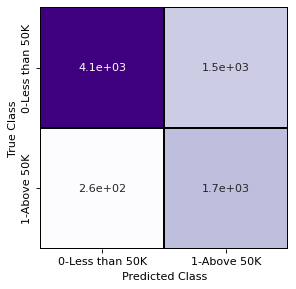

In [43]:
import seaborn as sns
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=80)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


+ The precision and recall for label 0 is high which shows that the model has effectively predicted maximum of 0 labels with high accuracy.
+ The recall for label 1 is high(0.87) but the precision is low(0.53).This model has detected target values with label 1 effectively but the accuracy of predicting label 1 is low.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


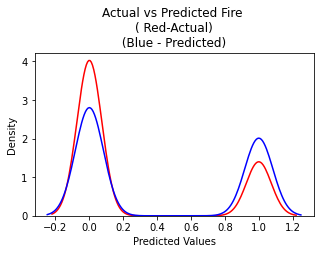

In [44]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.distplot(Y_test, hist=False, color="r", axlabel="Actual Value" )
sns.distplot(pred1, hist=False, color="b", axlabel="Predicted Values" )
plt.title('Actual vs Predicted Fire \n( Red-Actual)\n (Blue - Predicted) ')
plt.show()
plt.close()

##Kernal- Linear

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(X_train, Y_train) #machine learm from train data later do test data

SVC(kernel='linear')

In [46]:
#Predict the test result on tested data set
y_pred1 = classifier.predict(X_test)
y_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred1,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.79      0.98      0.87      5553
    1-Above 50K       0.83      0.24      0.37      1930

       accuracy                           0.79      7483
      macro avg       0.81      0.61      0.62      7483
   weighted avg       0.80      0.79      0.74      7483



In [48]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix2= confusion_matrix(Y_test, y_pred1)
conf_matrix2

array([[5457,   96],
       [1471,  459]])

In [49]:
AccuracyScore = accuracy_score(Y_test, y_pred1)
AccuracyScore*100

79.05920085527195

Text(20.722222222222214, 0.5, 'True Class')

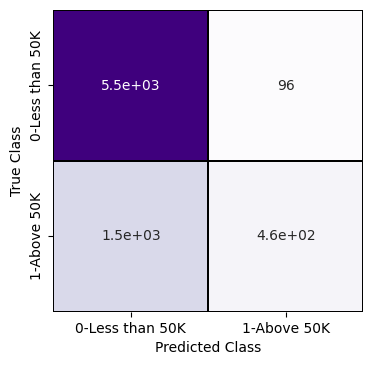

In [56]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix2,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

##Keranal - Sigmoid

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = "sigmoid")
classifier.fit(X_train, Y_train) #machine learm from train data later do test data

SVC(kernel='sigmoid')

In [52]:
#Predict the test result on tested data set
y_pred2 = classifier.predict(X_test)
y_pred2

array([0, 1, 0, ..., 0, 1, 0])

In [57]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred2,target_names=names))
print(np.mean(y_pred2==Y_test)*100, "%")

                 precision    recall  f1-score   support

0-Less than 50K       0.73      0.73      0.73      5553
    1-Above 50K       0.22      0.22      0.22      1930

       accuracy                           0.60      7483
      macro avg       0.47      0.47      0.47      7483
   weighted avg       0.60      0.60      0.60      7483

59.5616731257517 %


In [55]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix3= confusion_matrix(Y_test, y_pred2)
conf_matrix3

array([[4040, 1513],
       [1513,  417]])

Text(20.722222222222214, 0.5, 'True Class')

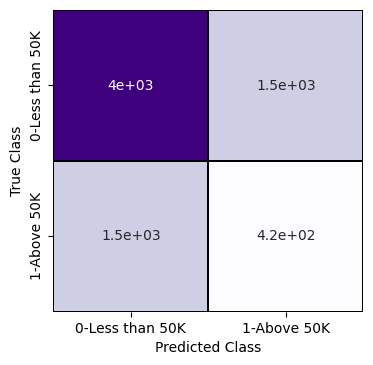

In [58]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix3,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

##Kernal = RBF

In [61]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf")
classifier.fit(X_train, Y_train) #machine learm from train data later do test data

SVC()

In [62]:
#Predict the test result on tested data set
y_pred3 = classifier.predict(X_test)
y_pred3

array([1, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred3,target_names=names))
print(np.mean(y_pred3==Y_test)*100, "%")

                 precision    recall  f1-score   support

0-Less than 50K       0.84      0.95      0.89      5553
    1-Above 50K       0.79      0.47      0.59      1930

       accuracy                           0.83      7483
      macro avg       0.81      0.71      0.74      7483
   weighted avg       0.83      0.83      0.82      7483

83.09501536816785 %


In [64]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix4= confusion_matrix(Y_test, y_pred3)
conf_matrix4

array([[5303,  250],
       [1015,  915]])

Text(20.722222222222214, 0.5, 'True Class')

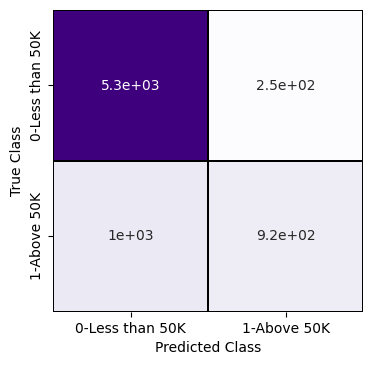

In [65]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix4,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

##Keranal = Poly


In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = "poly")
classifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [67]:
#Predict the test result on tested data set
y_pred4 = classifier.predict(X_test)
y_pred4

array([1, 0, 1, ..., 0, 0, 1])

In [83]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred4,target_names=names))
print(np.mean(y_pred4==Y_test)*100, "%")

                 precision    recall  f1-score   support

0-Less than 50K       0.84      0.95      0.89      5553
    1-Above 50K       0.77      0.46      0.58      1930

       accuracy                           0.83      7483
      macro avg       0.80      0.71      0.73      7483
   weighted avg       0.82      0.83      0.81      7483

82.50701590271281 %


In [69]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix5= confusion_matrix(Y_test, y_pred4)
conf_matrix5

array([[5282,  271],
       [1038,  892]])

Text(20.722222222222214, 0.5, 'True Class')

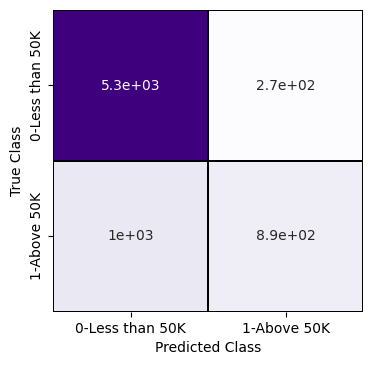

In [70]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix5,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

59.5616731257517 %


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

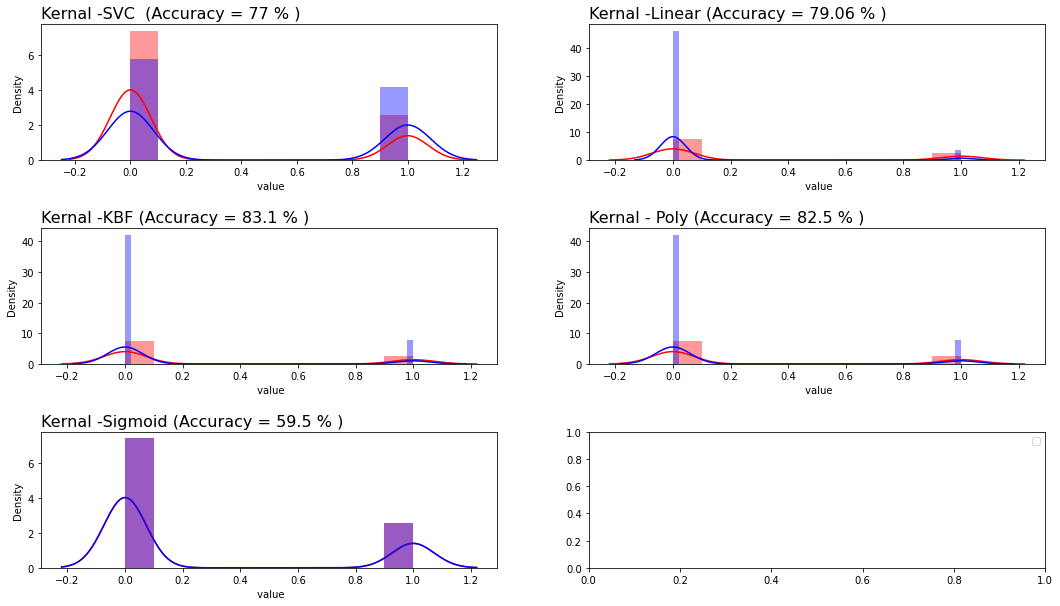

In [82]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=.5)
sns.distplot( Y_test, hist=True, color="r",axlabel= ' value', label= 'Actual value', ax=axes[0, 0])
sns.distplot(pred1, hist=True, color="b",label= 'Predicted value' ,ax=axes[0, 0] )
axes[0, 0].set_title('Kernal -SVC  (Accuracy = 77 % ) ', loc='left',size = 16)
plt.legend()



sns.distplot( Y_test, hist=True, color="r",axlabel= ' value', label= 'Actual value', ax=axes[0, 1] )
sns.distplot(y_pred1, hist=True, color="b" , ax=axes[0, 1] )
axes[0, 1].set_title('Kernal -Linear (Accuracy = 79.06 % ) ', loc='left',size = 16)
print(np.mean(y_pred2==Y_test)*100, "%")


sns.distplot( Y_test, hist=True, color="r",axlabel= ' value', label= 'Actual value', ax=axes[1, 0] )
sns.distplot(y_pred3, hist=True, color="b", ax=axes[1, 0] )
axes[1, 0].set_title('Kernal -KBF (Accuracy = 83.1 % ) ', loc='left',size = 16)


sns.distplot( Y_test, hist=True, color="r",axlabel= ' value', label= 'Actual value' , ax=axes[1, 1] )
sns.distplot(y_pred4, hist=True, color="b",axlabel=None , ax=axes[1, 1] )
axes[1, 1].set_title('Kernal - Poly (Accuracy = 82.5 % ) ', loc='left',size = 16)



sns.distplot( Y_test, hist=True, color="r",axlabel= ' value', label= 'Actual value', ax=axes[2, 0] )
sns.distplot(y_pred2, hist=True, color="b",axlabel=None , ax=axes[2, 0] )
axes[2, 0].set_title('Kernal -Sigmoid (Accuracy = 59.5 % ) ', loc='left',size = 16)
plt.legend()
plt.show()
plt.close()